# Tarea IA
##Julio Cesar Cons Calderón

Buscar el camino correcto y diferenciar entre Depth first search y Breadth first search es un proceso vital para la optimización de problemas. En esta codigo desarrollado por Bryan Yu para el curso de Inteligencia Artificial con python, se muestre un laberinto y una serie de metodos que se usan para resolver. Los dos algoritmos que se utilizarán son el DFS y el BFS.  

En esta celda se genera la clase Node. Sus atributos son el estado en el que se encuentra (coordenadas actuales), de cual otro nodo fue generada(coordenadas anteriores) y cual fue la acción que genero ese nodo.

In [1]:
class Node():
    def __init__(self, state, parent, action):
        self.state = state
        self.parent = parent
        self.action = action

En esta celda se genera el algoritmo para DFS. Cuando se llama la función se crea una lista vacia que contendra los elementos en el frontier. Tiene un metodo que añade elementos al frontier, verifica si esta vacio y el mas importante, elimina el ultimo elemento del frontier. 

In [2]:
class StackFrontier():
    def __init__(self):
        self.frontier = []

    def add(self, node):
        self.frontier.append(node)

    def contains_state(self, state):
        return any(node.state == state for node in self.frontier)

    def empty(self):
        return len(self.frontier) == 0

    def remove(self):
        if self.empty():
            raise Exception("empty frontier")
        else:
            node = self.frontier[-1]
            self.frontier = self.frontier[:-1]
            return node

Aqui se genera el algoritmo para el BFS. Se heredan los mismos metodos de la clase DFS, exceptuando la parte de la eliminación de los elementos en el frontier. Aquí se elimina el primer elemento de la lista.  

In [3]:
class QueueFrontier(StackFrontier):

    def remove(self):
        if self.empty():
            raise Exception("empty frontier")
        else:
            node = self.frontier[0]
            self.frontier = self.frontier[1:]
            return node

En celda se genera la clase Maze que tiene varios metodos.  

Esta sección de codigo tiene varias diferencias que con el original. Primero la clase maze ahora requiere dos atributos, el nombre del archivo de texto que contiene al laberinto y que algoritmo se utilizara para solucionar el laberinto.  


```
def __init__(self, filename,metodo):
        self.metodo=metodo
```
```
if self.metodo == "DFS":
          frontier = StackFrontier()
        else:
          frontier = QueueFrontier()
```
El metodo neighbours dependiendo del estado del nodo, se comprueba cuales son sus estados "vecinos". Este metodo define una lista de posibles acciones y como ejecutarlas dependiendo del estado del nodo actual. En el codigo original, se muestra como: 

```
candidates = [
            ("up", (row - 1, col)),
            ("down", (row + 1, col)),
            ("left", (row, col - 1)),
            ("right", (row, col + 1))
        ]
```

Definir a los candidatos de esta manera, le da prioridad a la acción que va desde la ultima a la primera. De esta manera, cuando hay una bifurcación primero le da prioridad a ir hacia la derecha, despues a la izquierda, despues hacia abajo y por ultimo hacia arriba. En los laberintos que creamos, los inicios estan por la esquina superior izquierda y los finales en la esquinza inferior derecha. Por lo que nos conviene definir el orden de prioridad de bifurcación como:
```
candidates = [
            ("up", (row - 1, col)),
            ("left", (row, col - 1)),
            ("down", (row + 1, col)),

            ("right", (row, col + 1))
        ]
```
De esta manera lo implementamos.

In [4]:

class Maze():

    def __init__(self, filename,metodo):
        self.metodo=metodo

        # Read file and set height and width of maze
        with open(filename) as f:
            contents = f.read()

        # Validate start and goal
        if contents.count("A") != 1:
            raise Exception("maze must have exactly one start point")
        if contents.count("B") != 1:
            raise Exception("maze must have exactly one goal")

        # Determine height and width of maze
        contents = contents.splitlines()
        self.height = len(contents)
        self.width = max(len(line) for line in contents)

        # Keep track of walls
        self.walls = []
        for i in range(self.height):
            row = []
            for j in range(self.width):
                try:
                    if contents[i][j] == "A":
                        self.start = (i, j)
                        row.append(False)
                    elif contents[i][j] == "B":
                        self.goal = (i, j)
                        row.append(False)
                    elif contents[i][j] == " ":
                        row.append(False)
                    else:
                        row.append(True)
                except IndexError:
                    row.append(False)
            self.walls.append(row)

        self.solution = None


    def print(self):
        solution = self.solution[1] if self.solution is not None else None
        print()
        for i, row in enumerate(self.walls):
            for j, col in enumerate(row):
                if col:
                    print("█", end="")
                elif (i, j) == self.start:
                    print("A", end="")
                elif (i, j) == self.goal:
                    print("B", end="")
                elif solution is not None and (i, j) in solution:
                    print("*", end="")
                else:
                    print(" ", end="")
            print()
        print()


    def neighbors(self, state):
        row, col = state
        candidates = [
            ("up", (row - 1, col)),
            ("left", (row, col - 1)),
            ("down", (row + 1, col)),
            ("right", (row, col + 1))
        ]

        result = []
        for action, (r, c) in candidates:
            if 0 <= r < self.height and 0 <= c < self.width and not self.walls[r][c]:
                result.append((action, (r, c)))
        return result


    def solve(self):
        """Finds a solution to maze, if one exists."""

        # Keep track of number of states explored
        self.num_explored = 0

        # Initialize frontier to just the starting position
        start = Node(state=self.start, parent=None, action=None)
        if self.metodo == "DFS":
          frontier = StackFrontier()
        else:
          frontier = QueueFrontier()

        frontier.add(start)

        # Initialize an empty explored set
        self.explored = set()

        # Keep looping until solution found
        while True:

            # If nothing left in frontier, then no path
            if frontier.empty():
                raise Exception("no solution")

            # Choose a node from the frontier
            node = frontier.remove()
            self.num_explored += 1

            # If node is the goal, then we have a solution
            if node.state == self.goal:
                actions = []
                cells = []
                while node.parent is not None:
                    actions.append(node.action)
                    cells.append(node.state)
                    node = node.parent
                actions.reverse()
                cells.reverse()
                self.solution = (actions, cells)
                return

            # Mark node as explored
            self.explored.add(node.state)

            # Add neighbors to frontier
            for action, state in self.neighbors(node.state):
                if not frontier.contains_state(state) and state not in self.explored:
                    child = Node(state=state, parent=node, action=action)
                    frontier.add(child)


    def output_image(self, filename, show_solution=True, show_explored=False):
        from PIL import Image, ImageDraw
        cell_size = 50
        cell_border = 2

        # Create a blank canvas
        img = Image.new(
            "RGBA",
            (self.width * cell_size, self.height * cell_size),
            "black"
        )
        draw = ImageDraw.Draw(img)

        solution = self.solution[1] if self.solution is not None else None
        for i, row in enumerate(self.walls):
            for j, col in enumerate(row):

                # Walls
                if col:
                    fill = (40, 40, 40)

                # Start
                elif (i, j) == self.start:
                    fill = (255, 0, 0)

                # Goal
                elif (i, j) == self.goal:
                    fill = (0, 171, 28)

                # Solution
                elif solution is not None and show_solution and (i, j) in solution:
                    fill = (220, 235, 113)

                # Explored
                elif solution is not None and show_explored and (i, j) in self.explored:
                    fill = (212, 97, 85)

                # Empty cell
                else:
                    fill = (237, 240, 252)

                # Draw cell
                draw.rectangle(
                    ([(j * cell_size + cell_border, i * cell_size + cell_border),
                      ((j + 1) * cell_size - cell_border, (i + 1) * cell_size - cell_border)]),
                    fill=fill
                )

        img.save(filename)




En esta celda pusimos en una lista todos los elementos .txt, ya que estos contienen a todos los laberintos.

In [10]:
import os
ejemplo_dir = './'
contenido = os.listdir(ejemplo_dir)
txt = []
for fichero in contenido:
    if os.path.isfile(os.path.join(ejemplo_dir, fichero)) and fichero.endswith('.txt'):
        txt.append(fichero)
txt

['maze_2_Julio.txt', 'maze_1_Julio.txt', 'maze_3_Julio.txt']

In [ ]:
Creamos una función para imprimir el laberinto cuando no tiene solución.

In [6]:
def showMaze(text,metodo):
  m = Maze(text,metodo)
  name= text.split(".").pop(0)
  print(name)
  m.print()


Creamos una función para imprimir el laberinto cuando si tiene solución, ademas de decir en cuantos pasos lo hizo e imprimir. Tambien llamamos al metodo output_image que nos genera una imagen png con el laberinto resuelto y que otras opciones se exploraron

In [7]:
def showSolution(text,metodo):
  m = Maze(text,metodo)
  print("Solving with "+metodo)
  m.solve()
  print("States Explored:", m.num_explored)
  print("Solution:")
  m.print()
  name= text.split(".").pop(0)
  m.output_image(name+"_with_"+metodo +".png", show_explored=True)


Llamamos la función showMaze y mostramos la solución para los metodos DFS Y BFS, ademas de hacerlo para todos laberintos disponibles.

In [9]:

for texto in txt:
  showMaze(texto,"DFS")
  print("____________________________________")
  showSolution(texto,"DFS")
  print("____________________________________")
  showSolution(texto,"BFS")
  print("____________________________________")



maze_2_Julio

A     ████
███ ██████
    ██████
███     ██
█   ██████
███     ██
███████ ██
█       ██
███ ██████
█B     ███

____________________________________
Solving with DFS
States Explored: 39
Solution:

A***  ████
███*██████
   *██████
███*    ██
█  *██████
███*****██
███████*██
█  *****██
███*██████
█B**   ███

____________________________________
Solving with BFS
States Explored: 37
Solution:

A***  ████
███*██████
   *██████
███*    ██
█  *██████
███*****██
███████*██
█  *****██
███*██████
█B**   ███

____________________________________
maze_1_Julio

A       ██
█ █████ ██
█ █  ██ ██
█ ██ ██ ██
█ ██    ██
█ ████████
█ ████████
█       ██
███████ ██
███████B██

____________________________________
Solving with DFS
States Explored: 33
Solution:

A*      ██
█*█████ ██
█*█  ██ ██
█*██ ██ ██
█*██    ██
█*████████
█*████████
█*******██
███████*██
███████B██

____________________________________
Solving with BFS
States Explored: 31
Solution:

A*      ██
█*█████ ██
█*█  ██ ██
█*██ ██

In [124]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

class imagen():

  def __init__(self,metodo):
    self.metodo = metodo
    self.lista = self.lis()

  def lis(self):  
    ejemplo_dir = './'
    contenido = os.listdir(ejemplo_dir)
    img = []
    for fichero in contenido:
        if os.path.isfile(os.path.join(ejemplo_dir, fichero)) and fichero.endswith(str(self.metodo) + '.png'):
            img.append(fichero)
    return img    

  def array(self):
    array=[]
    for i in self.lista:
      aux=img = mpimg.imread('./'+str(i))
      array.append(aux)
    return array  

  def graficar(self):
    import matplotlib.pyplot as plt
    nx = len(self.lista)
    ny = 1
    dxs = 8.0
    dys = 6.0

    fig, ax = plt.subplots(ny, nx, sharey = True, figsize=(dxs*nx, dys*ny) )
    for i in range(nx):
        ax[i].imshow(self.array()[i],aspect="equal")
        ax[i].set_title(self.lista[i])
        ax[i].axis("off")
    plt.show()

  

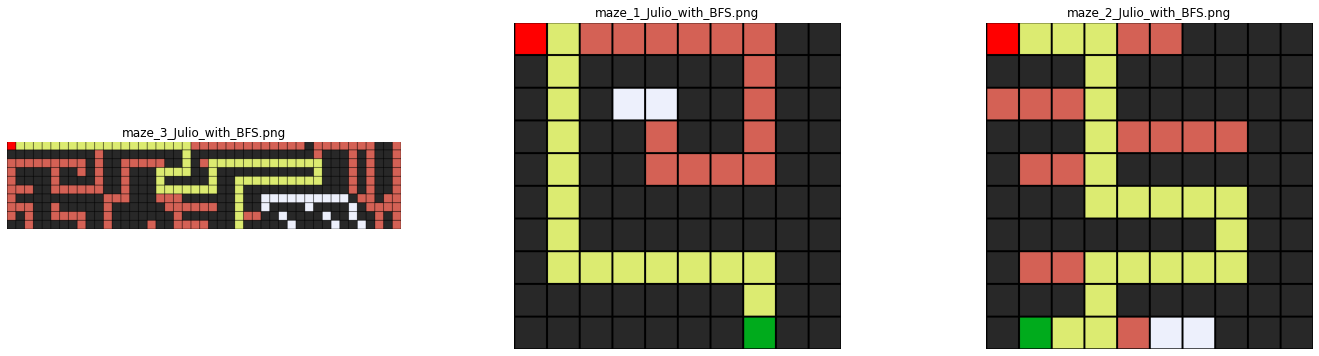

In [125]:
imagen("BFS").graficar()

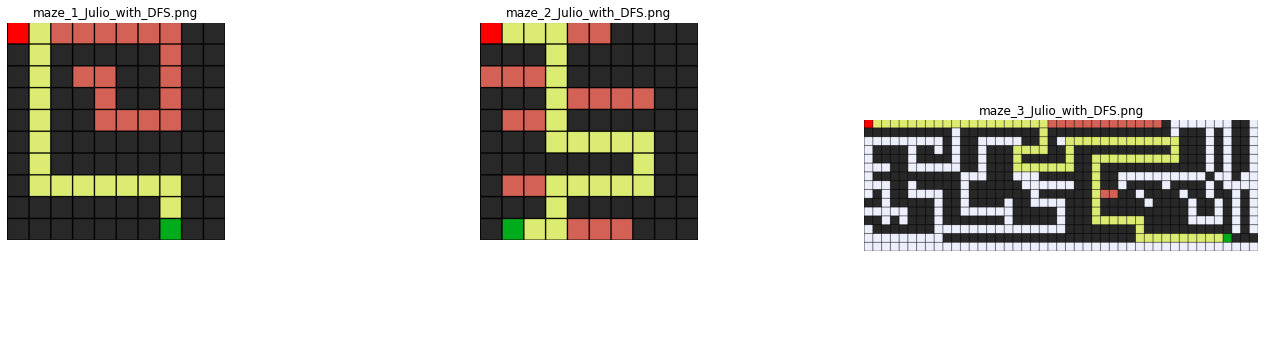

In [126]:
imagen("DFS").graficar()